## _*Using Grover Search for 3SAT problems*_

This notebook demonstrates how to use the `Qiskit Aqua` library Grover algorithm and process the result.

Further information is available for the algorithms in the github repo qiskit_aqua/readme.md

In [1]:
import pylab
import numpy as np
from qiskit import LegacySimulators
from qiskit.tools.visualization import plot_histogram
from qiskit_aqua import QuantumInstance
from qiskit_aqua import run_algorithm
from qiskit_aqua.algorithms import Grover
from qiskit_aqua.components.oracles import SAT

We have a SAT problem to which we want to find solutions using Grover and SAT oracle combination. The SAT problem is specified in the DIMACS CNF format. We read one of the sample cnf files to load the problem.

In [2]:
with open('3sat3-5.cnf', 'r') as f:
    sat_cnf = f.read()
print(sat_cnf)

c This is an example DIMACS 3-sat file with 3 satisfying solutions: 1 -2 3 0, -1 -2 -3 0, 1 2 -3 0
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0



With this problem input, we create the corresponding `oracle` component:

In [3]:
sat_oracle = SAT(sat_cnf)

The `oracle` can now be used to create an Grover instance:

In [4]:
grover = Grover(sat_oracle)

We can then configure the backend and run the Grover instance to get the result:

In [5]:
backend = LegacySimulators.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=100)
result = grover.run(quantum_instance)
print(result['result'])

[1, 2, -3]


As seen above, a satisfying solution to the specified sample SAT problem is obtained, with the absolute values indicating the variable indices, and the signs the `True/False` assignments, similar to the DIMACS format.

A measurements result is also returned where it can be seen, below in the plot, that `result['result']` was the highest probability. But the other solutions were very close in probability too.

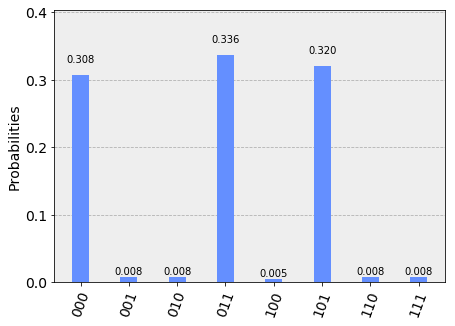

In [6]:
plot_histogram(result['measurements'])

The above step-by-step programatic approach can also be achieved by using a json configuration dictionary with the parameters for the algorithm and any other dependent objects it requires, as follows:

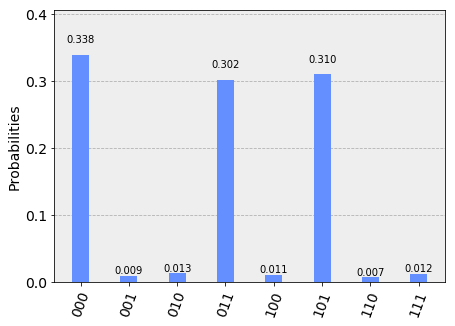

In [7]:
params = {
    'problem': {'name': 'search'},
    'algorithm': {
        'name': 'Grover'
    },
    'oracle': {
        'name': 'SAT',
        'cnf': sat_cnf
    },
    'backend': {
        'shots': 100
    }
}

result_dict = run_algorithm(params, backend=backend)
plot_histogram(result_dict['measurements'])